In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import json
#sc.logging.print_header()
file_path = '/work/users/mh823zote/projects/gating/data/CITEseq_Covid/' 
data_dir = file_path + 'data/' 

In [2]:
adata = sc.read_h5ad(data_dir + 'pdata_CD16_CD4_sub_denoised.h5ad')

In [3]:
sc.pp.log1p(adata)

In [4]:
cluster_string = 'CD16+ T cells'

## Joint panel


In [7]:
with open('/work/users/mh823zote/projects/gating/data/CITEseq_Covid/data/07_intersect_AB_citeseq_FACS.json', 'r') as f:
    FACS_panel = json.load(f)

In [8]:
FACS_panel

['AB_CD3',
 'AB_HLA-DR',
 'AB_CD16',
 'AB_CD19',
 'AB_CD14',
 'AB_CD45',
 'AB_CD8',
 'AB_CEACAM8',
 'AB_CD56',
 'AB_CD4']

In [10]:
adata = adata[:,FACS_panel]

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.811512     0.823460     0.826762     0.826555     0.811629
recall        0.742769     0.717975     0.714876     0.713843     0.692149
precision     0.894279     0.965278     0.980170     0.981534     0.980966


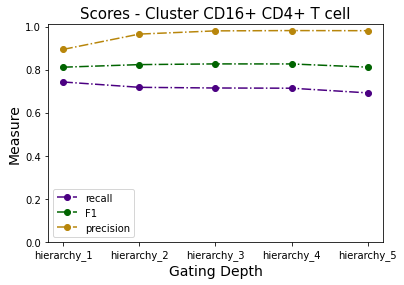

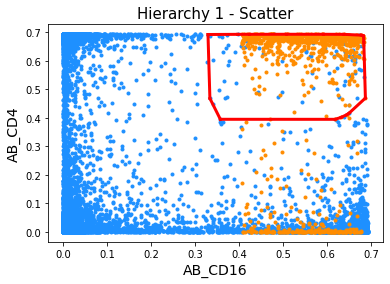

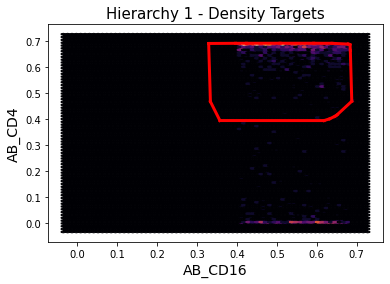

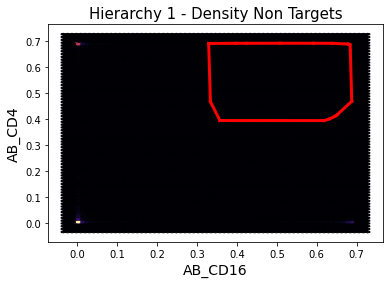

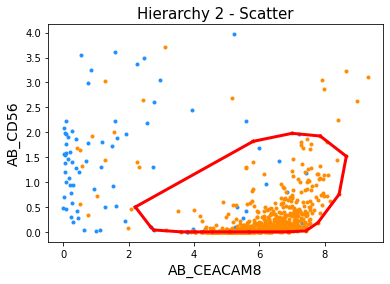

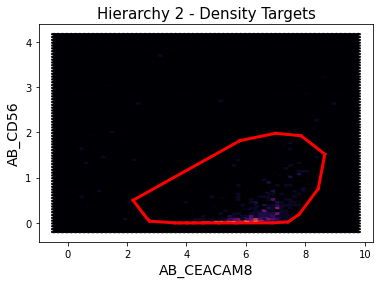

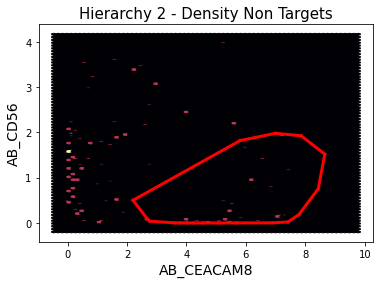

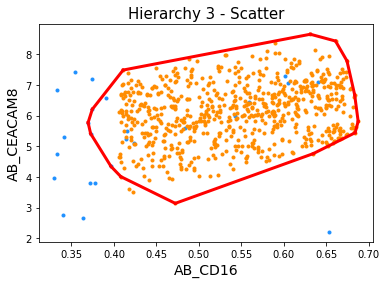

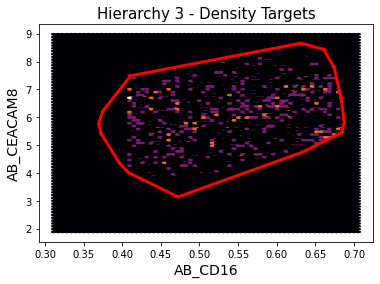

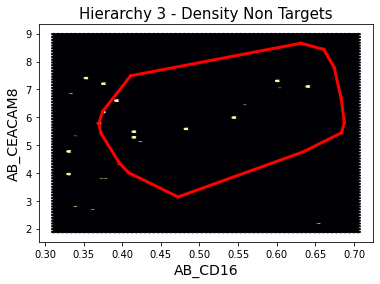

In [13]:
adata = adata.copy()
cluster_numbers = ['CD16+ CD4+ T cell']
cg.tools.gating_strategy(adata,cluster_numbers,cluster_string = cluster_string,add_noise=True)